In [28]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.DataFrame({
    'height': [160, 165, 170, 175, 180],
    'weight': [55, 60, 65, 72, 80]
})

In [ ]:
# Intercept

X = sm.add_constant(data["height"])
y = data["weight"]

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

In [ ]:
# Scatter plot
plt.scatter(data['height'], data['weight'], color='blue')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight')
plt.grid(True)
plt.show()

In [ ]:
# Predicted values for the regression line
predicted_weight = model.predict(X)

# Plot scatter + regression line
plt.scatter(data['height'], data['weight'], color='blue', label='Data points')
plt.plot(data['height'], predicted_weight, color='red', label='Regression line')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

model.params

In [ ]:
# Predicted values
predicted = model.predict(X)

# Plot with residuals
plt.scatter(data['height'], data['weight'], color='blue', label='Data points')
plt.plot(data['height'], predicted, color='red', label='Regression line')

# Draw residual lines
for i in range(len(data)):
    plt.vlines(x=data['height'][i],
               ymin=min(data['weight'][i], predicted[i]),
               ymax=max(data['weight'][i], predicted[i]),
               color='green',
               linestyle='dotted')

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight with Regression Line and Residuals')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Regression model
X = sm.add_constant(data['height'])  # Adds intercept
y = data['weight']
model = sm.OLS(y, X).fit()
predicted = model.predict(X)

# Mean line
mean_weight = np.mean(data['weight'])

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(data['height'], data['weight'], color='blue', label='Data points')
plt.plot(data['height'], predicted, color='red', label='Regression line')
plt.hlines(mean_weight, xmin=data['height'].min(), xmax=data['height'].max(),
           colors='orange', linestyles='--', label='Mean of Y')

# Annotate SST (total variation) and SSE (error)
for i in range(len(data)):
    # SST: deviation from mean (purple)
    plt.vlines(x=data['height'][i],
               ymin=min(data['weight'][i], mean_weight),
               ymax=max(data['weight'][i], mean_weight),
               color='purple', alpha=0.3)

    # SSE: deviation from predicted value (green)
    plt.vlines(x=data['height'][i],
               ymin=min(data['weight'][i], predicted[i]),
               ymax=max(data['weight'][i], predicted[i]),
               color='green', alpha=0.6)

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Visualizing SST, SSR, and SSE')
plt.legend()
plt.grid(True)
plt.show()

# With Genesis dataset

In [14]:
df = pd.read_csv("data/Genesis_dataset.csv").fillna("")
df = df[df.complement != "no complement"].copy()
df = df[df.comments != "reconstructed"].copy()
df = df[df.comments != "min excluded"].copy()
df['cmpl_constr'] = df['cmpl_constr'].replace("prep + prep", "prep")

In [17]:
set(df.cmpl_constr)

{'dir-he', 'prep', 'vc'}

In [18]:
# mapping dictionaries
cmpl_constr_map = {'dir-he': 0, 'prep': 1, 'vc': 2}
cmpl_complex_map = {'simple': 0, 'complex': 1}

# Apply mappings to df
df['cmpl_constr_enc'] = df['cmpl_constr'].map(cmpl_constr_map)
df['cmpl_complex_enc'] = df['cmpl_complex'].map(cmpl_complex_map)

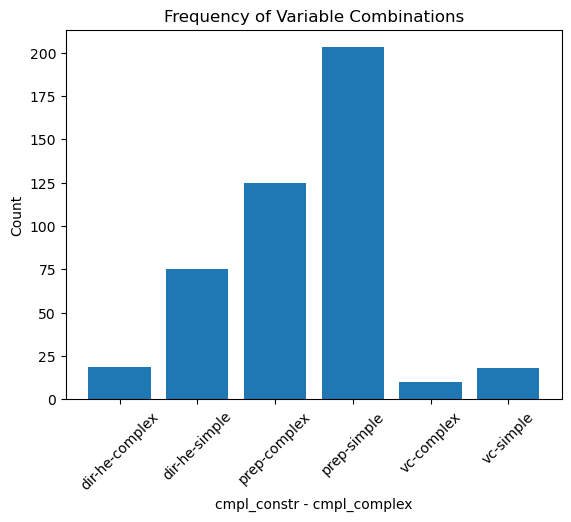

In [23]:
# Reverse mapping for labels
cmpl_constr_inv = {v: k for k, v in cmpl_constr_map.items()}
cmpl_complex_inv = {v: k for k, v in cmpl_complex_map.items()}

# Count combinations of original values
counts = df.groupby(['cmpl_constr', 'cmpl_complex']).size().reset_index(name='count')

# Create labels with original names
labels = [f"{c}-{m}" for c, m in zip(counts['cmpl_constr'], counts['cmpl_complex'])]

# Plot
plt.bar(x=range(len(counts)), height=counts['count'], tick_label=labels)
plt.xlabel('cmpl_constr - cmpl_complex')
plt.ylabel('Count')
plt.title('Frequency of Variable Combinations')
plt.xticks(rotation=45)
plt.show()

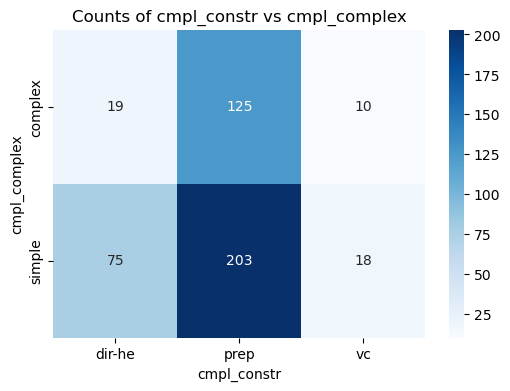

In [29]:
# Create a pivot table of counts
heatmap_data = df.pivot_table(
    index='cmpl_complex',
    columns='cmpl_constr',
    aggfunc='size',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title('Counts of cmpl_constr vs cmpl_complex')
plt.ylabel('cmpl_complex')
plt.xlabel('cmpl_constr')
plt.show()

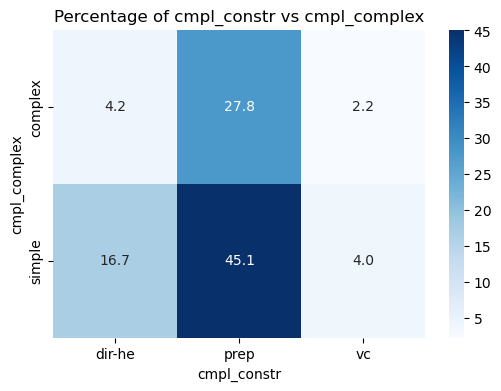

In [30]:
# Convert counts to percentages
heatmap_percent = heatmap_data / heatmap_data.sum().sum() * 100

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(heatmap_percent, annot=True, fmt=".1f", cmap='Blues')
plt.title('Percentage of cmpl_constr vs cmpl_complex')
plt.ylabel('cmpl_complex')
plt.xlabel('cmpl_constr')
plt.show()